# Inferential Statistics Ib - Frequentism

## Learning objectives

Welcome to the second Frequentist inference mini-project! Over the course of working on this mini-project and the previous frequentist mini-project, you'll learn the fundamental concepts associated with frequentist inference. The following list includes the topics you will become familiar with as you work through these two mini-projects:
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate confidence intervals and p-values
* how those confidence intervals and p-values allow you to perform hypothesis (or A/B) tests

## Prerequisites

For working through this notebook, you are expected to have a very basic understanding of:
* what a random variable is
* what a probability density function (pdf) is
* what the cumulative density function is
* a high-level sense of what the Normal distribution

If these concepts are new to you, please take a few moments to Google these topics in order to get a sense of what they are and how you might use them.

These two notebooks were designed to bridge the gap between having a basic understanding of probability and random variables and being able to apply these concepts in Python. This second frequentist inference mini-project focuses on a real-world application of this type of inference to give you further practice using these concepts. 

In the previous notebook, we used only data from a known normal distribution. You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.

## Hospital medical charges

Imagine that a hospital has hired you as their data analyst. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. This mini-project, as well as the bootstrap and Bayesian inference mini-projects also found in this unit are designed to illustrate how each of the inferential statistics methods have their uses for different use cases. In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?
Answering that last question with a frequentist approach makes some assumptions, or requires some knowledge, about the two groups. In the next mini-project, you'll use bootstrapping to test that assumption. And in the final mini-project of the unit, you're going to create a model for simulating _individual_ charges (not a sampling distribution) that the hospital can use to model a range of scenarios.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). For the purposes of this exercise, assume the observations are the result of random sampling from our one hospital.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from numpy.random import seed
medical = pd.read_csv('data/insurance2.csv')
%matplotlib inline

In [2]:
medical.shape

(1338, 8)

In [3]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__

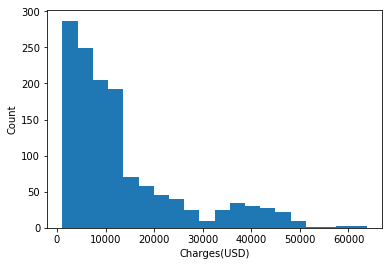

In [4]:
# Plot histogram of charges
plt.hist(medical.charges, bins = 20)
plt.xlabel('Charges(USD)')
plt.ylabel('Count')
plt.show()

In [5]:
# Calculate mean and standard deviation of charges
charges_mean = np.mean(medical.charges)
charges_std = np.std(medical.charges)
charges_mean,charges_std
# It seems that there is quite a spread in the hostipal charges

(13270.422265141257, 12105.484975561605)

__Q:__ The administrator is concerned that the actual average charge has fallen below 12000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed above, to apply?

__A:__ I would use t-test because according to the central limit thereom, the sampling distribution of the sampling mean should be relatively normal and the true mean will lie in the distribution with a degree of confidence. In addition, we only took one sample so sample size is very limited. The Null hypothesis is that the actual average charges has fallen below 12000 (population mean is 12000 or below). We will use the t-test to determine if 12,000 lies in the 95% confidence interval of the mean distribution.

__Q:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A one-sided or two-sided interval? Calculate the critical value and the relevant 95% confidence interval for the mean and comment on whether the administrator should be concerned?

__A:__

The average charge falling below $12000 will threaten the hospital's operation model, so the appropriate confidence interval should be 95%. This is a one-sided interval since it doesn't matter if the charges is very high. The Null hypothesis is that the 12000 is really the population mean. The question is how likely would we observe what we did given 12000 as the population mean?

In [6]:
#Calculation of t_value

alpha = 1 - 0.95
pop_mean = 12000
deg = len(medical.charges - 1)
t_value = 1.646

In [7]:
#Calculation of t_statistics

t_statistic = (charges_mean - pop_mean) / (charges_std/(np.sqrt(len(medical.charges))))
t_statistic

3.838786511901477

In [8]:
# Compare the t_statistics.

t_statistic < t_value
if t_statistic < t_value == True:
    print('the p-value is > 0.05. The Null hypothesis is accepted')
else:
    print('the p-value is < 0.05. The Null hypothesis is rejected')

the p-value is < 0.05. The Null hypothesis is rejected


In [9]:
# Calculation of confidence interval

In [10]:
# Calculate the margin of error

moe = t_value * np.std(medical.charges)/np.sqrt(len(medical.charges))
moe

544.7333530894142

In [11]:
# print confidence interval

print('The 95% confidence interval is: (' + str(np.mean(medical.charges) - moe) + ' - ' + str(np.mean(medical.charges) + moe) + ')')

The 95% confidence interval is: (12725.688912051843 - 13815.15561823067)


The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means where the pooled standard deviation of the two groups is given by
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t* test statistic is then given by

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

What assumption, or assumptions, are we making here?

__A:__ The null hypothesis is that people with insurance are charged the same amount than those without. The alternative is that they aren't. We will determine the probability we observe the t-statistics under the null hypothesis. We are assuming the sample variances are equal.

__Q:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__ 

In [12]:
# Dividing the dataset according to insuranceclaim

insured_charges = medical.charges[medical.insuranceclaim == 1]
uninsured_charges = medical.charges[medical.insuranceclaim == 0]

In [13]:
# Calculating the standard deviation of the pooled dataset

pooled_std = np.sqrt(((len(insured_charges) - 1) * np.var(insured_charges, ddof = 1) + (len(uninsured_charges) - 1) * np.var(uninsured_charges, ddof = 1)) \
                    / (len(insured_charges) + len(uninsured_charges) - 2))

In [14]:
# Calculating the t-statistcs

t_statistic = (np.mean(insured_charges) - np.mean(uninsured_charges)) / (pooled_std * np.sqrt(1/len(insured_charges) + 1/len(uninsured_charges)))

In [15]:
t_statistic

11.89329903087671

In [16]:
# Determine the p-value

t_statistic < t_value
if t_statistic < t_value == True:
    print('the p-value is > 0.05. The Null hypothesis is accepted')
else:
    print('the p-value is < 0.05. The Null hypothesis is rejected')

the p-value is < 0.05. The Null hypothesis is rejected


In [17]:
# Using appropriate function to calculate t-statistics

import scipy.stats
scipy.stats.ttest_ind(insured_charges, uninsured_charges)

Ttest_indResult(statistic=11.893299030876712, pvalue=4.461230231620717e-31)

Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and that is much easier to use. All you need to do is pass it your data.

__Q:__ In the above calculations, we assumed the sample variances were equal. We may well suspect they are not (we'll explore this in another assignment). The calculation becomes a little more complicated to do by hand in this case, but we now know of a helpful function. Check the documentation for the function to tell it not to assume equal variances and perform the test again.

__A:__

In [18]:
scipy.stats.ttest_ind(insured_charges, uninsured_charges, equal_var = False)

Ttest_indResult(statistic=13.298031957975649, pvalue=1.1105103216309125e-37)

__Q:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__

## Learning outcomes

Having completed this project notebook, you have good hands-on experience of
* how you can use the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* how to then perform inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test